In [55]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [60]:
data=pd.read_csv('DomainCorrect.csv')

In [61]:
data

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [63]:
x=data.iloc[:,0:7]
y=data.iloc[:,7]

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [65]:
oversample = SMOTE(random_state=42)
X_r,y_r=oversample.fit_resample(X_train,y_train)

In [66]:
y_test.shape,X_test.shape,X_r.shape,y_r.shape

((30,), (30, 4), (132, 4), (132,))

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
import itertools

In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [69]:
#Logistic Regreession with Hyper Parameter tunning

In [70]:
logModel = LogisticRegression()

In [71]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [74]:
best_clf = clf.fit(X_r,y_r)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   27.6s finished
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [75]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, max_iter=1000, penalty='none', solver='sag')

Accuracy of LogisticRegression  classifier on training set: 0.98
Accuracy of LogisticRegression classifier on test set: 1.00
accuracy:   1.000
Confusion matrix, without normalization


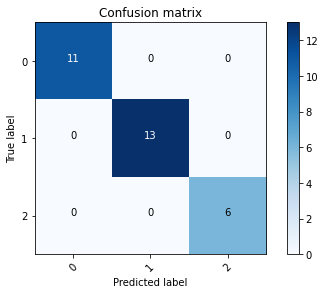

In [76]:
pred = best_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of LogisticRegression  classifier on training set: {:.2f}'
     .format(best_clf.score(X_r, y_r)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(best_clf.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [51]:
#Logistic Regression with default Parameters

In [52]:
dp = LogisticRegression()

In [53]:
dp.fit(X_r,y_r)

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy of LogisticRegression  classifier on training set: 0.84
Accuracy of LogisticRegression classifier on test set: 0.83
accuracy:   0.832
Confusion matrix, without normalization


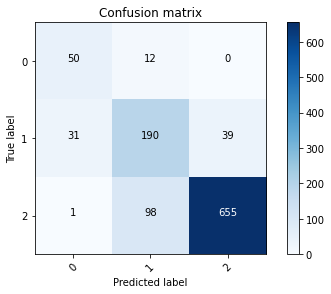

In [54]:
pred = dp.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of LogisticRegression  classifier on training set: {:.2f}'
     .format(dp.score(X_r, y_r)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(dp.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['0', '1','2'])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.61      0.87      0.72        62
           1       0.64      0.74      0.69       260
           2       0.95      0.87      0.91       754

    accuracy                           0.84      1076
   macro avg       0.73      0.83      0.77      1076
weighted avg       0.86      0.84      0.84      1076



In [78]:
will=pd.read_csv('iris.csv')

In [80]:
XX=data.iloc[:,0:4]
YY=data.iloc[:,4]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XX,YY,test_size=0.2,random_state=0)

In [81]:
dpp = LogisticRegression()

In [82]:
dp.fit(XX,YY)

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
pred = dpp.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of LogisticRegression  classifier on training set: {:.2f}'
     .format(dpp.score(XX, YY)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(dpp.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['0', '1','2'])

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
print(classification_report(y_test, pred))